 # Flight Price Prediction

## Data Description

As we all know fligt ticket prices are something that is hard to estimate. It's quite unpredictable as it fluctuates every day. Here we will now build a machine learning model to predict flight prices.

The data provides has two parts training data where prices are given and second data where we have to predict prices

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_excel(r"Data_Train.xlsx", parse_dates=["Date_of_Journey"])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Data Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null datetime64[ns]
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.1+ KB


In [5]:
df.shape

(10683, 11)

Number of rows = 10683

Number of rows = 11

In [6]:
df.drop_duplicates(inplace=True)  ## Drop duplicate rows if any

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Only 2 missing values exists which is very less so we can drop missing data

In [8]:
df.dropna(inplace= True)

In [9]:
df.shape

(10462, 11)

In [10]:
df.reset_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

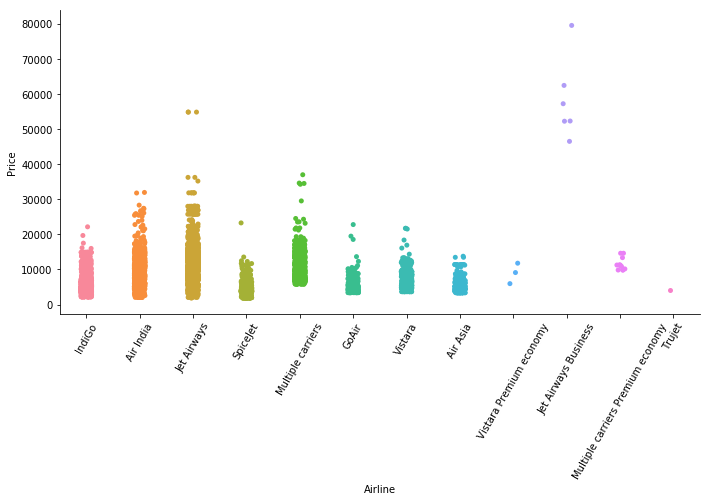

In [11]:
sns.catplot(x="Airline", y="Price", data=df, aspect=2)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

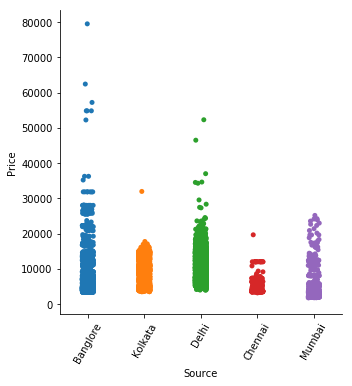

In [12]:
sns.catplot(x="Source", y="Price", data=df, aspect=1)
plt.xticks(rotation=60)

Flights from bangalore and delhi tend to have higher prices

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

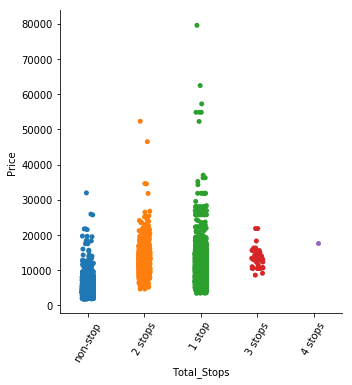

In [13]:
sns.catplot(x="Total_Stops", y="Price", data=df)
plt.xticks(rotation=60)

Flights having only one stops may have higher prices

#### Using Various techniques to encode our data and make it more simpler

In [14]:
time= df[["Dep_Time","Arrival_Time","Duration"]]
time=pd.DataFrame(time)
time.head()

,Dep_Time,Arrival_Time,Duration
0,22:20,01:10 22 Mar,2h 50m
1,05:50,13:15,7h 25m
2,09:25,04:25 10 Jun,19h
3,18:05,23:30,5h 25m
4,16:50,21:35,4h 45m


In [15]:
list=[]
hrs=[]
min=[]
list=time["Dep_Time"]
for i in range(len(list)):
    hrs.append(list[i][:2])  ## Seperating hours and minutes
    min.append(list[i][3:])
time["Dep_time_hours"]=hrs
time["Dep_time_min"]=min

In [16]:
list=[]
hrs=[]
min=[]
list=time["Duration"]
for i in range(len(list)):
    str=[]
    str=list[i].split(' ')
    if(len(str)>1):
        hrs.append(str[0][:-1])   ## Seperating hours and minutes
        min.append(str[1][:-1])
    else:
        hrs.append(list[i][:-1])
        min.append('0')
time["Duration_hours"]=hrs
time["Duration_min"]=min

In [17]:
list=[]
hrs=[]
min=[]
list=time["Arrival_Time"]
for i in range(len(list)):
    hrs.append(list[i][:2])  ## Seperating hours and minutes
    min.append(list[i][3:5])
time["Arrival_time_hours"]=hrs
time["Arrival_time_min"]=min

In [18]:
time.head()

,Dep_Time,Arrival_Time,Duration,Dep_time_hours,Dep_time_min,Duration_hours,Duration_min,Arrival_time_hours,Arrival_time_min
0,22:20,01:10 22 Mar,2h 50m,22,20,2,50,01,10
1,05:50,13:15,7h 25m,05,50,7,25,13,15
2,09:25,04:25 10 Jun,19h,09,25,19,0,04,25
3,18:05,23:30,5h 25m,18,05,5,25,23,30
4,16:50,21:35,4h 45m,16,50,4,45,21,35


In [19]:
time.drop(columns=["Dep_Time","Arrival_Time","Duration"],inplace=True)  #drop unnecessary columns

In [20]:
## Extracting data from dates column
df_dates=pd.DataFrame()
df_dates["Month"]=df["Date_of_Journey"].dt.month_name()
df_dates["day"]=df["Date_of_Journey"].dt.day_name()
df_dates["year"]=df["Date_of_Journey"].dt.year

In [21]:
data=pd.concat([df,df_dates,time],axis=1)
data.head()

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,...,Price,Month,day,year,Dep_time_hours,Dep_time_min,Duration_hours,Duration_min,Arrival_time_hours,Arrival_time_min
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,...,3897,March,Sunday,2019,22,20,2,50,01,10
1,1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,...,7662,January,Saturday,2019,05,50,7,25,13,15
2,2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,...,13882,September,Friday,2019,09,25,19,0,04,25
3,3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,...,6218,December,Thursday,2019,18,05,5,25,23,30
4,4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,...,13302,January,Thursday,2019,16,50,4,45,21,35


In [22]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [23]:
# Encoding Total_Stops Column
data["Total_Stops"]=data["Total_Stops"].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
data.head()

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,...,Price,Month,day,year,Dep_time_hours,Dep_time_min,Duration_hours,Duration_min,Arrival_time_hours,Arrival_time_min
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,...,3897,March,Sunday,2019,22,20,2,50,01,10
1,1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,...,7662,January,Saturday,2019,05,50,7,25,13,15
2,2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,...,13882,September,Friday,2019,09,25,19,0,04,25
3,3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,...,6218,December,Thursday,2019,18,05,5,25,23,30
4,4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,...,13302,January,Thursday,2019,16,50,4,45,21,35


We will now drop the uneccessary columns from which we have already extracted data

Since year has single value and thus have no impact on any of the variables therefore we can drop it

In [24]:
data.drop(columns=["Date_of_Journey","Dep_Time","Arrival_Time","Duration","year"],inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 16 columns):
index                 10462 non-null int64
Airline               10462 non-null object
Source                10462 non-null object
Destination           10462 non-null object
Route                 10462 non-null object
Total_Stops           10462 non-null int64
Additional_Info       10462 non-null object
Price                 10462 non-null int64
Month                 10462 non-null object
day                   10462 non-null object
Dep_time_hours        10462 non-null object
Dep_time_min          10462 non-null object
Duration_hours        10462 non-null object
Duration_min          10462 non-null object
Arrival_time_hours    10462 non-null object
Arrival_time_min      10462 non-null object
dtypes: int64(3), object(13)
memory usage: 1.3+ MB


Since most of our data is in object type we will use label encoder to encode our data

In [26]:
data.shape

(10462, 16)

Data now has 10463 rows and 16 columns

In [27]:
lab_enc=LabelEncoder()
cols=["Airline", "Source", "Destination", "Route","Duration_hours","Duration_min", "Additional_Info","Month",
     "day","Dep_time_hours","Dep_time_min","Arrival_time_hours","Arrival_time_min","Total_Stops"]
for i in cols:
    df1= lab_enc.fit_transform(data[i])
    data[i]=df1
data.head()

,index,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,day,Dep_time_hours,Dep_time_min,Duration_hours,Duration_min,Arrival_time_hours,Arrival_time_min
0,0,3,0,5,18,0,8,3897,4,3,22,4,11,10,1,2
1,1,1,3,0,84,2,8,7662,2,2,5,10,40,4,13,3
2,2,4,2,1,118,2,8,13882,6,0,9,5,10,0,4,5
3,3,3,3,0,91,1,8,6218,1,4,18,1,38,4,23,6
4,4,3,0,5,29,1,8,13302,2,4,16,10,33,8,21,7


In [28]:
data.drop(columns=["index"],inplace=True)

#### Correlation

In [29]:
data.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,day,Dep_time_hours,Dep_time_min,Duration_hours,Duration_min,Arrival_time_hours,Arrival_time_min
Airline,1.000000,-0.012172,0.015942,0.029636,-0.194549,-0.058220,-0.036491,0.001810,-0.001575,-0.032267,-0.062421,0.001147,-0.059209,-0.005438,-0.073045
Source,-0.012172,1.000000,-0.589992,0.403884,0.194203,-0.021587,0.013796,0.079885,-0.039485,0.060218,-0.056609,-0.062644,-0.186553,0.028257,0.021392
Destination,0.015942,-0.589992,1.000000,-0.457559,-0.291763,0.024922,-0.065875,-0.048041,0.002127,-0.074056,0.128523,-0.143730,0.045254,-0.044605,0.016351
Route,0.029636,0.403884,-0.457559,1.000000,0.441347,0.042804,0.154374,0.155349,0.020728,-0.075188,-0.070978,0.188077,-0.252892,0.021612,-0.174172
Total_Stops,-0.194549,0.194203,-0.291763,0.441347,1.000000,-0.079284,0.602013,0.112907,-0.017449,-0.067523,-0.002695,0.241634,-0.104164,0.051476,-0.107099
Additional_Info,-0.058220,-0.021587,0.024922,0.042804,-0.079284,1.000000,-0.068779,-0.016147,0.027720,-0.059406,-0.015916,0.000956,0.028441,0.021293,0.044321
Price,-0.036491,0.013796,-0.065875,0.154374,0.602013,-0.068779,1.000000,0.059352,-0.024566,0.005155,-0.024155,0.163283,-0.083437,0.031023,-0.086163
Month,0.001810,0.079885,-0.048041,0.155349,0.112907,-0.016147,0.059352,1.000000,0.103445,-0.011129,-0.030391,0.023352,-0.032157,-0.006694,-0.034254
day,-0.001575,-0.039485,0.002127,0.020728,-0.017449,0.027720,-0.024566,0.103445,1.000000,-0.007783,-0.001917,-0.009054,0.003333,-0.008582,0.003719
Dep_time_hours,-0.032267,0.060218,-0.074056,-0.075188,-0.067523,-0.059406,0.005155,-0.011129,-0.007783,1.000000,-0.015068,0.006035,0.012556,-0.003827,0.072989


#### HeatMap

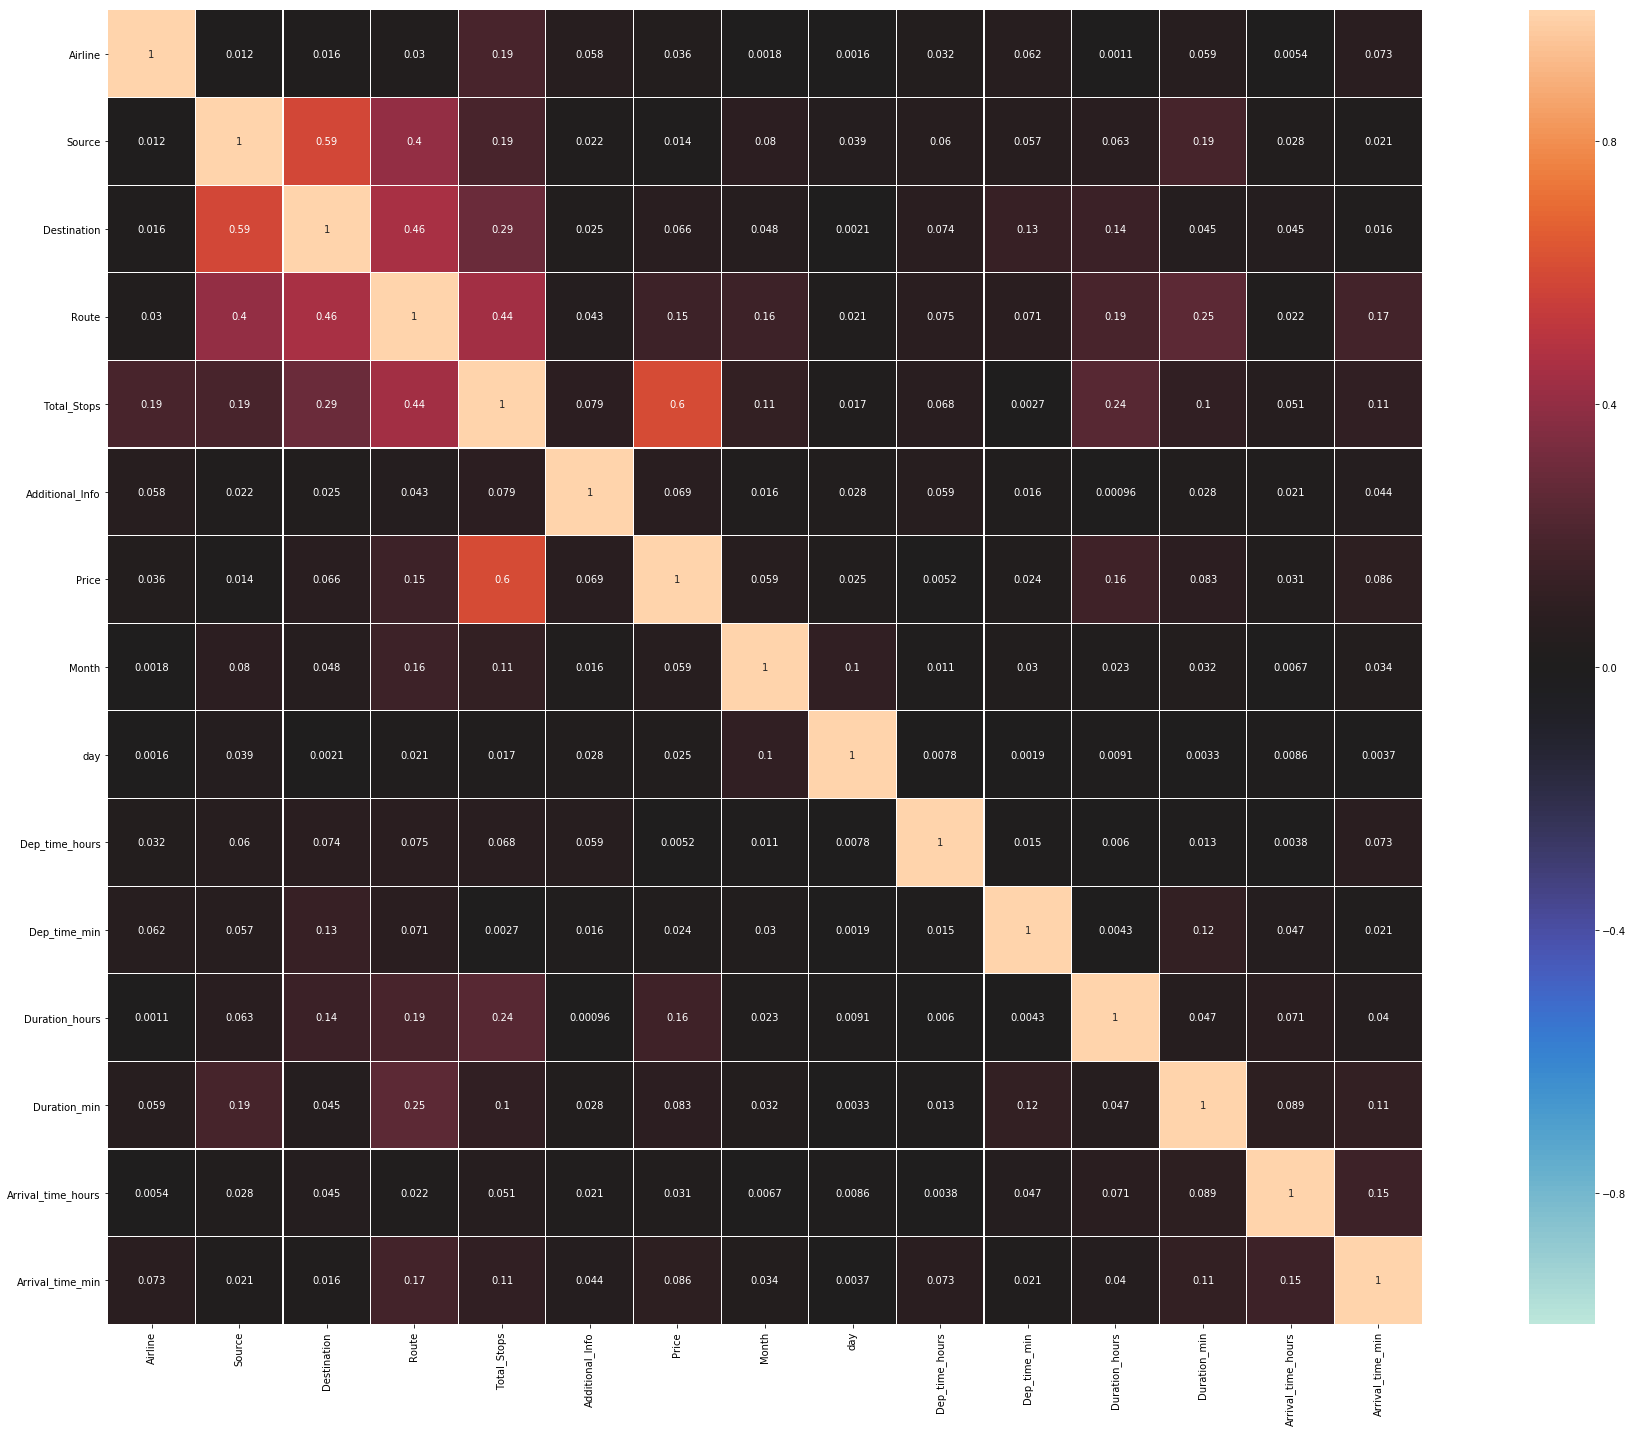

In [35]:
## HeatMap
df_corr= data.corr().abs()
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

In [31]:
# Correlation with target variable
corr_mat=data.corr()
corr_mat["Price"].sort_values(ascending=False)

Price                 1.000000
Total_Stops           0.602013
Duration_hours        0.163283
Route                 0.154374
Month                 0.059352
Arrival_time_hours    0.031023
Source                0.013796
Dep_time_hours        0.005155
Dep_time_min         -0.024155
day                  -0.024566
Airline              -0.036491
Destination          -0.065875
Additional_Info      -0.068779
Duration_min         -0.083437
Arrival_time_min     -0.086163
Name: Price, dtype: float64

We observe that our target variable has both positive and negative correlation with other variables. Also we observe multicollinearity between Source, Destination, Route and Total Stops.

Minimum Correlation of target variable is with "Dep_time_hours"

Maximum Correlation of target variable is with "Total_Stops"

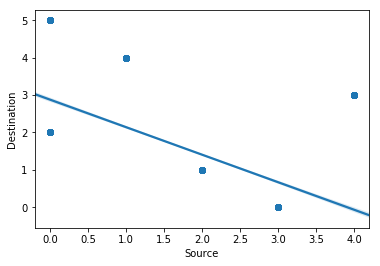

In [32]:
sns.regplot(x=data["Source"],y=data["Destination"])

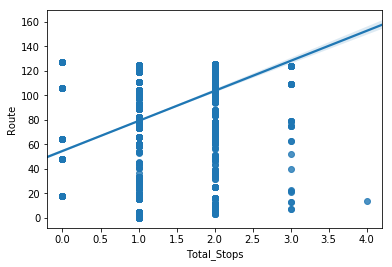

In [33]:
sns.regplot(x=data["Total_Stops"],y=data["Route"])

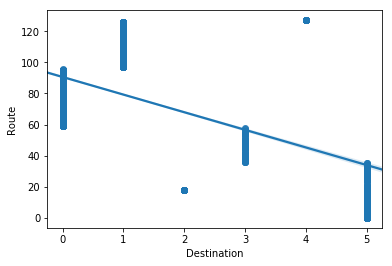

In [34]:
sns.regplot(x=data["Destination"],y=data["Route"])

Sine the features showing multicollinearity has high correlation with target variable we won't delete it.

#### Check for Outliers

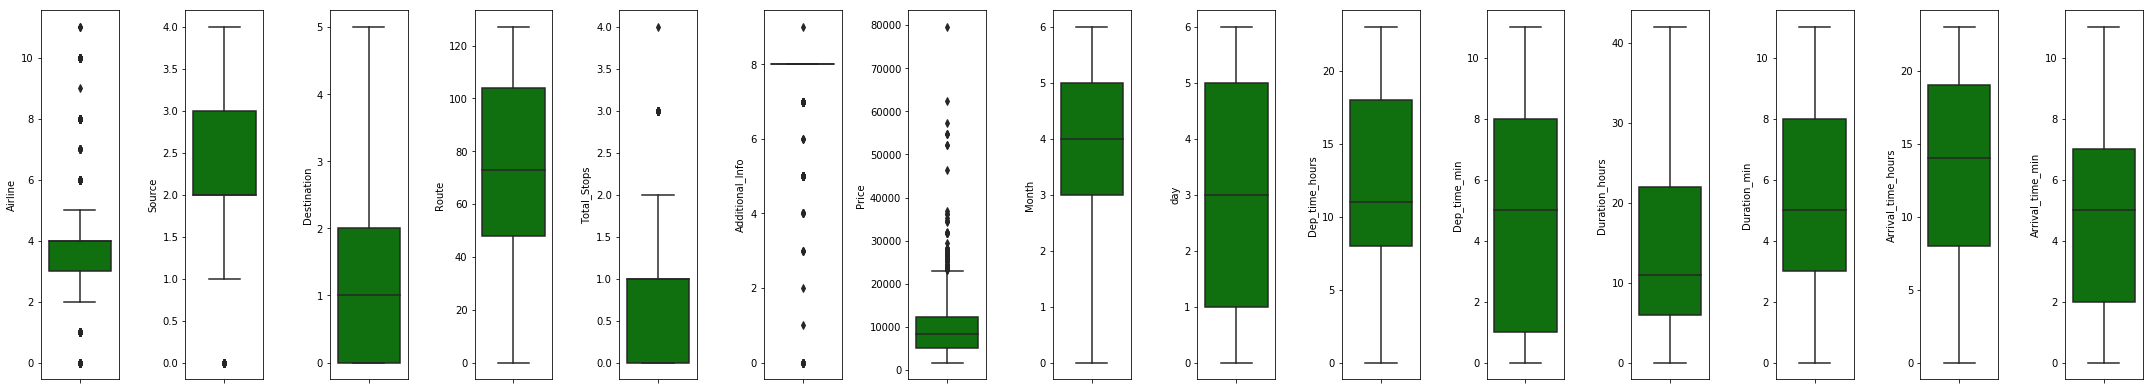

In [36]:
collist=data.columns.values
plt.figure(figsize=(40,80))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

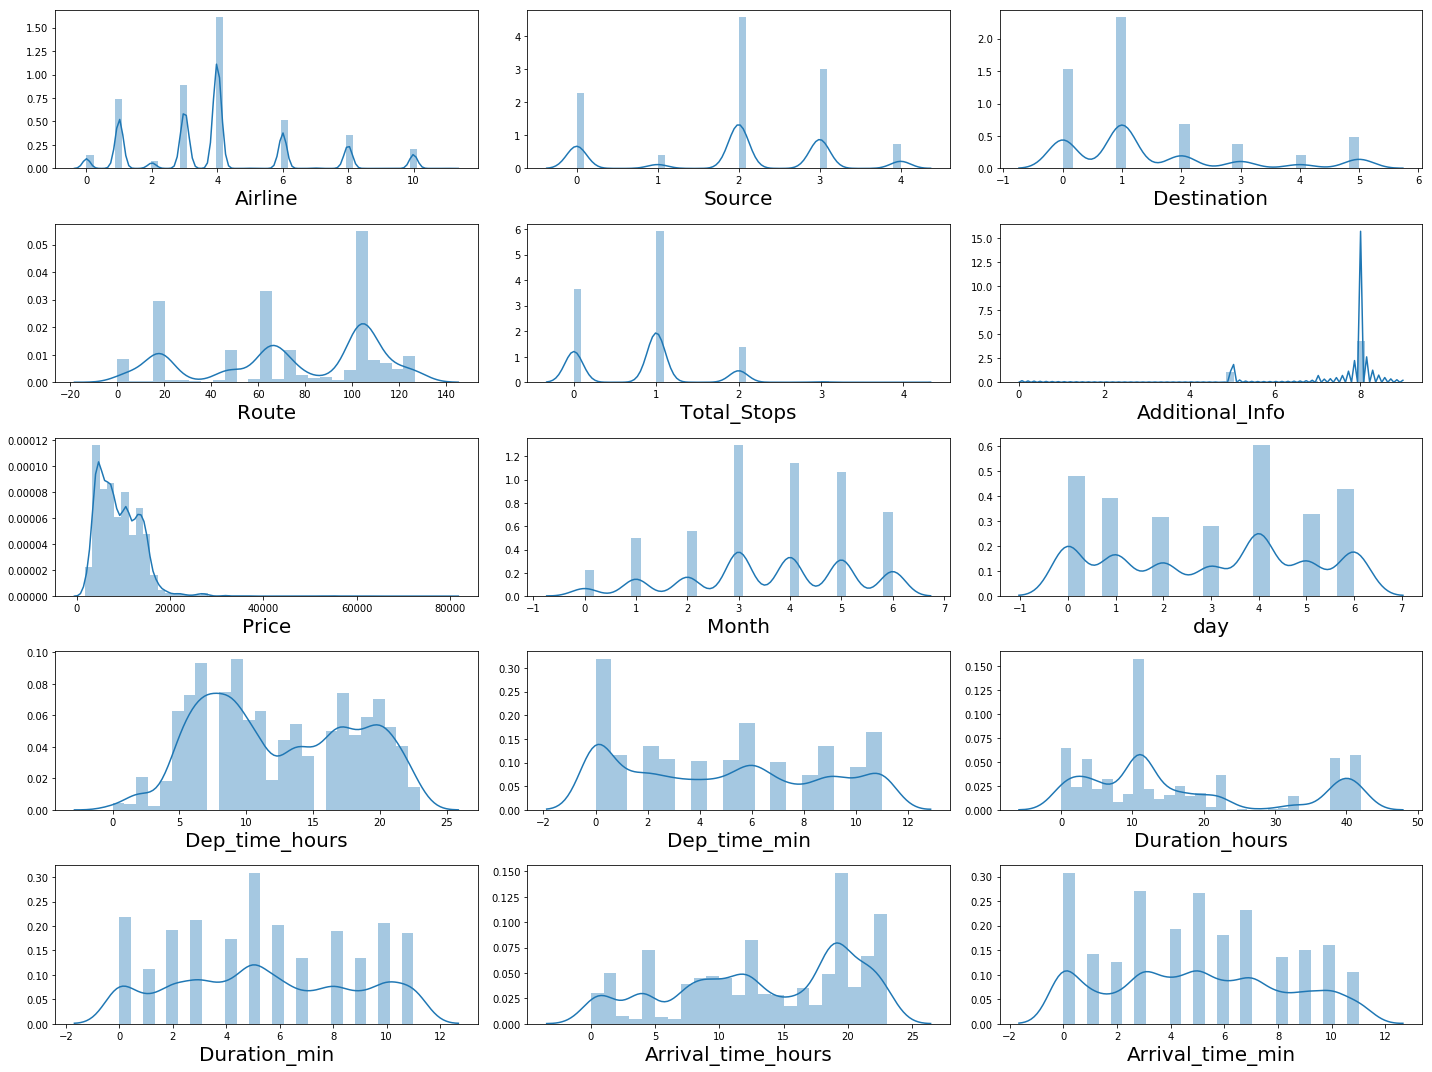

In [37]:
## checking for Normal Distribution of curve
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

Since Most of our data is categorical or encoded we observe skewness and outliers here.

#### Check for skewness

In [38]:
data.skew()

Airline               0.723567
Source               -0.419669
Destination           1.225081
Route                -0.481865
Total_Stops           0.332309
Additional_Info      -1.796501
Price                 1.857490
Month                -0.339982
day                  -0.067156
Dep_time_hours        0.108306
Dep_time_min          0.171301
Duration_hours        0.748659
Duration_min          0.051718
Arrival_time_hours   -0.378978
Arrival_time_min      0.110802
dtype: float64

We do not require any further data cleaning as we don't observe skewness in our continuous data

In [39]:
# Seperating feature and target variable
x=data.drop(columns=["Price"])
y=data["Price"]

In [40]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

In [41]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=3)

## Building Model

#### Linear Regression

In [42]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
score_lm=lm.score(x_test,y_test)
print("Linear regression: Accuracy = ",score_lm)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Linear regression: Accuracy =  0.41342562955661255
Root Mean Squared Error=  3449.738275030882
Mean Squared Error=  11900694.166213047


We observe a very high mse so we will regularize our model

#### Lasso CV

In [51]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print("R2 score = ",lasso_reg.score(x_test,y_test))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score =  0.413431175581392
Mean Squared Error=  6342708.439630455
Root Mean Squared Error=  2518.4734343706023


This very high mse is because of the range of price column

#### KNN Model

In [45]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=knn.score(x_test,y_test)
print("KNN regression: Accuracy = ",score_knn)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

KNN regression: Accuracy =  0.6551891627587794
Root Mean Squared Error=  2644.9353385028944


#### Decision Tree Model

In [46]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=dt.score(x_test,y_test)
print("Decision Tree regression: Accuracy = ",score_dt)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Decision Tree regression: Accuracy =  0.6873736810710684
Root Mean Squared Error=  2518.4734343706023


### Model Evaluation

Checking for cross validation score

#### Linear Regression

In [47]:
lm_cv=cross_val_score(lm,x_train, y_train,cv=5).mean()
lm_cv

0.39279006493333773

#### KNN Model

In [48]:
knn_cv=cross_val_score(knn,x_train, y_train,cv=5).mean()
knn_cv

0.6524393914681778

#### Decision Tree Model

In [49]:
dt_cv=cross_val_score(dt,x_train, y_train,cv=5).mean()
dt_cv

0.7329993861047726

#### Lasso CV

In [50]:
lass_cv=cross_val_score(lasso_reg,x_train, y_train,cv=5).mean()
lass_cv

0.39279124011345024

We will choose Decision Tree model as best due to higher cv score and comparatively less rmse.

### Hyper-Parameter Tuning

In [52]:
dt_r= DecisionTreeRegressor()
grid_param={'criterion':['mse'],
           'max_depth':range(2,20,3),
           'min_samples_leaf':range(1,20,4),
           'min_samples_split':range(2,20,2)}
grid_search= GridSearchCV(estimator=dt_r, param_grid= grid_param, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_parameter= grid_search.best_params_
print(best_parameter)

{'criterion': 'mse', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [53]:
dt_r=DecisionTreeRegressor(criterion='mse', max_depth=11, min_samples_leaf=1, min_samples_split=8)
dt_r.fit(x_train, y_train)
y_pred= dt_r.predict(x_test)
print("Decision Tree regression: Accuracy = ",dt_r.score(x_test,y_test))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Decision Tree regression: Accuracy =  0.7553837539727367
Mean Squared Error=  4962888.3884870475
Root Mean Squared Error=  2227.7541131119133


#### Saving Model

In [54]:
## savig model
filename= "flightPrice_prediction.pickle"
pickle.dump(dt_r, open(filename, 'wb'))

### We will now load our testing data set and predict the prices of flight

In [55]:
df_test=pd.read_excel(r"Test_set.xlsx", parse_dates=["Date_of_Journey"])
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### We will now follow all the preprocessing steps on this data to predict the prices

In [56]:
time= df_test[["Dep_Time","Arrival_Time","Duration"]]
time=pd.DataFrame(time)
list=[]
hrs=[]
min=[]
list=time["Dep_Time"]
for i in range(len(list)):
    hrs.append(list[i][:2])
    min.append(list[i][3:])
time["Dep_time_hours"]=hrs
time["Dep_time_min"]=min

list=[]
hrs=[]
min=[]
list=time["Duration"]
for i in range(len(list)):
    str=[]
    str=list[i].split(' ')
    if(len(str)>1):
        hrs.append(str[0][:-1])
        min.append(str[1][:-1])
    else:
        hrs.append(list[i][:-1])
        min.append('0')
time["Duration_hours"]=hrs
time["Duration_min"]=min

list=[]
hrs=[]
min=[]
list=time["Arrival_Time"]
for i in range(len(list)):
    hrs.append(list[i][:2])
    min.append(list[i][3:5])
time["Arrival_time_hours"]=hrs
time["Arrival_time_min"]=min

df_dates=pd.DataFrame()
df_dates["Month"]=df_test["Date_of_Journey"].dt.month_name()
df_dates["day"]=df_test["Date_of_Journey"].dt.day_name()
df_dates["year"]=df_test["Date_of_Journey"].dt.year

test=pd.concat([df_test,df_dates,time],axis=1)
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,year,Dep_Time,Arrival_Time,Duration,Dep_time_hours,Dep_time_min,Duration_hours,Duration_min,Arrival_time_hours,Arrival_time_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,2019,17:30,04:25 07 Jun,10h 55m,17,30,10,55,04,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,2019,06:20,10:20,4h,06,20,4,0,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,2019,19:15,19:00 22 May,23h 45m,19,15,23,45,19,00
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,2019,08:00,21:00,13h,08,00,13,0,21,00
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,2019,23:55,02:45 25 Jun,2h 50m,23,55,2,50,02,45


In [57]:
test.drop(columns=["Date_of_Journey","Dep_Time","Arrival_Time","Duration","year"],inplace=True)

test["Total_Stops"]=test["Total_Stops"].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

lab_enc=LabelEncoder()
cols=["Airline", "Source", "Destination", "Route","Duration_hours","Duration_min", "Additional_Info","Month",
     "day","Dep_time_hours","Dep_time_min","Arrival_time_hours","Arrival_time_min","Total_Stops"]
for i in cols:
    df1= lab_enc.fit_transform(test[i])
    test[i]=df1
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month,day,Dep_time_hours,Dep_time_min,Duration_hours,Duration_min,Arrival_time_hours,Arrival_time_min
0,4,2,1,76,1,5,3,4,17,6,1,11,4,5
1,3,3,0,65,1,5,1,4,6,4,33,0,10,4
2,4,2,1,76,1,3,5,5,19,3,15,8,19,0
3,6,2,1,76,1,5,5,5,8,0,4,0,21,0
4,0,0,2,16,0,5,3,1,23,11,11,10,2,9


In [58]:
## Prediction using saved model
loaded_model= pickle.load(open(filename,'rb'))
price_pred= loaded_model.predict(scale.transform(test))

In [59]:
# Saving the list of price in csv format
price_pred=pd.DataFrame(price_pred)
price_pred.to_csv('Price.csv')